Like Guevara, we estimate the values in the weight matrix by partial least squares regression.

In our case:
    1. The independent variables for the regression equations are the dimensions of the corpus based vectors of the component nouns.
    2. The AN vectors provide the dependent variables.

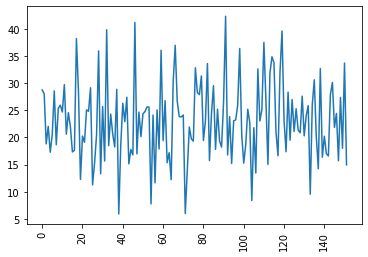

None


PLSRegression(copy=True, max_iter=500, n_components=2, scale=True, tol=1e-06)

In [112]:
# Sample PLR

import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import train_test_split


# load boston data using sklearn datasets
boston = datasets.load_boston()

# separate data and target values
x = boston.data
y = boston.target

# tabular data structure with labeled axes
# (rows and columns) using DataFrame
df_x = pd.DataFrame(x, columns=boston.feature_names)
df_y = pd.DataFrame(y)

# create PLSRegression model
pls2 = PLSRegression(n_components=2)

# split data
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.30, random_state=1)

# fit the model
model=pls2.fit(x_train, y_train)

# predict the values
Y_pred = pls2.predict(x_test)

# plot the predicted Values
plt.plot(Y_pred)
plt.xticks(rotation=90)
print (plt.show())

# print the predicted value
# print(Y_pred)

PLSRegression()



# Test

In [57]:
pls2.fit(x_train, y_train)

PLSRegression(copy=True, max_iter=500, n_components=2, scale=True, tol=1e-06)

In [55]:
# for text only
# learning adjective matrices

import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import train_test_split


# x-axis should be nouns
# y-axis should be adjective-nouns

# separate data and target values
x = pd.read_csv("/Users/sabanazir/Documents/Adj-Noun Composition/fast/Nouns/openl3_noun_embeddings.csv")
y = pd.read_csv("/Users/sabanazir/Documents/Adj-Noun Composition/fast/Adj-Nouns/openl3_adjnoun_embeddings.csv")

df_x= x.loc[:, x.columns!=x.columns[0]]
df_y= y.loc[:, y.columns!=y.columns[0]]

print(df_x.shape, df_y.shape)


# create PLSRegression model
pls2 = PLSRegression(n_components=2)

# split data
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.30, random_state=1)

# fit the model
pls2.fit(x_train, y_train)

# predict the values
Y_pred = pls2.predict(scale(y_test))

# plot the predicted Values
# plt.plot(Y_pred)
# plt.xticks(rotation=90)
# plt.show()

# print the predicted value
print ("x_train", x_train.shape, "y_train", y_train.shape)
print ("x_test", x_test.shape, "y_test", y_test.shape)

from sklearn.preprocessing import scale 
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, pls2.predict(scale(y_test)))




(194, 512) (194, 512)
x_train (135, 512) y_train (135, 512)
x_test (59, 512) y_test (59, 512)


0.7075378163068997

/opt/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:79: ConvergenceWarning: Maximum number of iterations reached
  ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:79: ConvergenceWarning: Maximum number of iterations reached
  ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:79: ConvergenceWarning: Maximum number of iterations reached
  ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:79: ConvergenceWarning: Maximum number of iterations reached
  ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:79: ConvergenceWarning: Maximum number of iterations reached
  ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:79: ConvergenceWarning: Maximum number of iterations reached
  ConvergenceWarning)
/opt/anaconda3/lib/python3.7

(-1, 19.9)

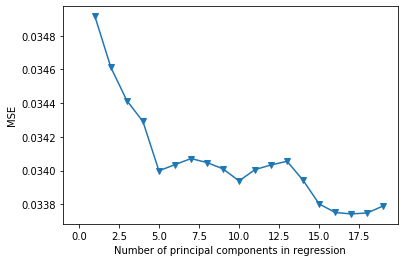

In [31]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.cross_decomposition import PLSRegression, PLSSVD
from sklearn.metrics import mean_squared_error

n = len(x_train)

# 10-fold CV, with shuffle
kf_10 = model_selection.KFold(n_splits=10, shuffle=True, random_state=1)

mse = []

for i in np.arange(1, 20):
    pls = PLSRegression(n_components=i)
    score = model_selection.cross_val_score(pls, scale(x_train), y_train, cv=kf_10, scoring='neg_mean_squared_error').mean()
    mse.append(-score)

# Plot results
plt.plot(np.arange(1, 20), np.array(mse), '-v')
plt.xlabel('Number of principal components in regression')
plt.ylabel('MSE')
# plt.title('Salary')
plt.xlim(xmin=-1)

In [42]:
import pandas as pd
v= pd.DataFrame(Y_pred)
v

,0,1,2,3,4,5,6,7,8,9,...,758,759,760,761,762,763,764,765,766,767
0,0.101676,0.166022,0.111098,-0.060879,0.141475,-0.080939,-0.132330,0.139669,-0.132435,-0.243054,...,0.402009,-0.321758,0.108202,0.245531,0.301240,0.046613,-0.158749,-0.057618,-0.271242,-0.141855
1,0.100653,0.162312,0.119864,-0.068043,0.133741,-0.087903,-0.135637,0.142704,-0.115222,-0.245092,...,0.397498,-0.327109,0.116580,0.241978,0.296280,0.063005,-0.174850,-0.065498,-0.277967,-0.146006
2,0.106309,0.155667,0.107252,-0.073241,0.144105,-0.073491,-0.125416,0.142251,-0.131900,-0.239835,...,0.406571,-0.334364,0.105403,0.240837,0.296747,0.041949,-0.175322,-0.054388,-0.276510,-0.138154
3,0.100119,0.162584,0.121525,-0.068138,0.132338,-0.089580,-0.136709,0.142960,-0.112618,-0.245667,...,0.396433,-0.326906,0.118096,0.241814,0.295883,0.065906,-0.175976,-0.066973,-0.278572,-0.146946
4,0.056343,0.243505,0.180198,0.020757,0.087308,-0.174954,-0.207066,0.128734,-0.068782,-0.279831,...,0.343446,-0.230741,0.166432,0.273224,0.321553,0.153308,-0.075126,-0.117708,-0.251043,-0.191316
5,0.075122,0.200287,0.166260,-0.031411,0.096477,-0.145878,-0.179410,0.139949,-0.063001,-0.267058,...,0.361205,-0.283531,0.156705,0.253239,0.302097,0.137608,-0.146418,-0.106111,-0.274042,-0.177013
6,0.088568,0.180552,0.141476,-0.050267,0.116417,-0.115111,-0.156279,0.141241,-0.091267,-0.255431,...,0.380473,-0.306123,0.135231,0.247511,0.299296,0.097641,-0.160521,-0.084406,-0.275761,-0.160536
7,0.106300,0.147490,0.118085,-0.086744,0.134318,-0.080781,-0.127864,0.147174,-0.108203,-0.241656,...,0.401770,-0.345461,0.116020,0.234570,0.288616,0.062966,-0.202308,-0.064195,-0.287286,-0.142722
8,0.080601,0.198142,0.148372,-0.029364,0.111640,-0.128106,-0.168232,0.136930,-0.091568,-0.261015,...,0.372504,-0.284737,0.140321,0.255420,0.306811,0.106209,-0.132728,-0.090216,-0.266983,-0.167018
9,0.106662,0.158896,0.101654,-0.067553,0.149100,-0.069359,-0.123696,0.140033,-0.143473,-0.238700,...,0.409266,-0.329874,0.099990,0.243555,0.300393,0.031299,-0.163343,-0.049339,-0.271625,-0.135638


In [52]:
# separate data and target values
x = pd.read_csv("/Users/sabanazir/Documents/Adj-Noun Composition/fast/Nouns/bert_noun_embeddings.csv")
y = pd.read_csv("/Users/sabanazir/Documents/Adj-Noun Composition/fast/Adj-Nouns/bert_adjnoun_embeddings.csv")

# tabular data structure with labeled axes
# (rows and columns) using DataFrame

df_x= x.loc[:, x.columns!=x.columns[0]]
df_y= y.loc[:, y.columns!=y.columns[0]]


from sklearn.cross_decomposition import PLSRegression  
from sklearn.metrics import mean_squared_error, r2_score  
from sklearn.model_selection import cross_val_predict    
# Define PLS object  
pls = PLSRegression(n_components=5)    
# Fit  
# pls.fit(X, Y) 
pls2.fit(df_x, df_y)

# Cross-validation  
y_cv = cross_val_predict(pls, df_x, df_y, cv=10)    
y_cv
# # Calculate scores  
score = r2_score(df_y, y_cv)  
mse = mean_squared_error(df_y, y_cv)

print (score, mse)

0.03172161366185263 0.033323184309242825


### Proportion of Variance

In [34]:
import numpy as np
from sklearn import cross_decomposition

# X is a numpy ndarray with samples in rows and predictor variables in columns
# y is one-dimensional ndarray containing the response variable

total_variance_in_x = np.var(df_x, axis = 0)

pls1 = cross_decomposition.PLSRegression(n_components = 768)
pls1.fit(df_x, df_y) 

# variance in transformed X data for each latent vector:
variance_in_x = np.var(pls1.x_scores_, axis = 0) 

# normalize variance by total variance:
fractions_of_explained_variance = variance_in_x / total_variance_in_x
fractions_of_explained_variance

/opt/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:292: UserWarning: Y residual constant at iteration 193
  warnings.warn('Y residual constant at iteration %s' % k)


1      335.677106
2      366.365412
3      170.686568
4      387.328613
5      153.593052
          ...    
764      0.000000
765      0.000000
766      0.000000
767      0.000000
768      0.000000
Length: 768, dtype: float64

In [239]:
# separate data and target values
x = pd.read_csv("/Users/sabanazir/Documents/Adj-Noun Composition/fast/Nouns/openl3_noun_embeddings.csv")
y = pd.read_csv("/Users/sabanazir/Documents/Adj-Noun Composition/fast/Adj-Nouns/openl3_adjnoun_embeddings.csv")



# tabular data structure with labeled axes
# (rows and columns) using DataFrame

df_x= x.loc[:, x.columns!=x.columns[0]]
df_y= y.loc[:, y.columns!=y.columns[0]]


# df_x.to_csv("xtest.csv", header=None)
# df_y.to_csv("ytest.csv", header=None)


# import numpy as np
# np.array(['1','2','3']).astype(np.float)

import PartialLeastSquares as PLS

XMatrix_file = "xtest.csv"
YMatrix_file = "ytest.csv"

print(df_x.shape)
print(df_y.shape)


pls = PLS.PartialLeastSquares(
        XMatrix_file =  XMatrix_file,
        YMatrix_file =  YMatrix_file,
        epsilon      = 0.0001,
      )
x=pls.get_XMatrix_from_csv()
y=pls.get_YMatrix_from_csv()

B = pls.PLS()
print(B.shape)

print("\n\nDisplaying the column-wise mean for the X matrix:")
print(pls.mean0X)
print("\n\nDisplaying the column-wise mean for the Y matrix:")
print(pls.mean0Y)
print("\n\nDisplaying the matrix of regression coefficients:")
print(B)



(194, 512)
(194, 512)


The X matrix: 
[[1.802 4.246 2.591 ... 1.701 2.341 2.738]
 [1.665 4.36  2.709 ... 1.745 2.511 2.587]
 [1.628 4.716 2.754 ... 1.784 2.341 2.392]
 ...
 [1.572 4.153 2.781 ... 1.541 2.353 2.893]
 [1.691 4.214 2.913 ... 1.535 2.411 3.209]
 [1.78  4.724 2.778 ... 1.771 2.311 2.614]]


The Y matrix: 
[[1.533 4.287 2.843 ... 1.384 2.449 2.897]
 [1.396 4.192 2.725 ... 1.528 2.166 2.782]
 [1.688 4.453 3.12  ... 1.634 2.459 3.354]
 ...
 [1.317 4.346 3.554 ... 1.092 2.699 2.889]
 [1.664 5.334 2.66  ... 2.242 2.254 3.125]
 [1.902 3.799 2.553 ... 1.599 2.316 2.473]]
(512, 512)


Displaying the column-wise mean for the X matrix:
[[1.672 4.311 2.824 2.854 2.12  3.049 2.295 1.574 2.478 3.515 2.594 2.653
  2.112 2.422 1.893 2.016 1.659 3.221 2.178 3.164 3.25  1.79  2.54  3.745
  3.302 2.656 2.506 1.802 2.54  2.085 1.661 3.184 2.48  3.383 1.675 1.661
  1.93  2.611 3.453 1.789 3.724 2.592 2.302 3.757 3.548 2.762 2.238 4.021
  3.254 2.486 1.278 2.765 2.717 0.863 2.288 3.009 3.492 1

In [240]:
Xtest= df_x
print(Xtest.shape)
print((pls.mean0X).shape)
# Xtest.values-pls.mean0X
Ytest =(Xtest.values-pls.mean0X) * B   +   pls.mean0Y
# Xtest -  pls.mean0Y
# pls.mean0X
Ytest.shape

(194, 512)
(1, 512)


(194, 512)

In [237]:
# import pandas as pd
# Bmatx=pd.DataFrame(B)


# x = pd.read_csv("/Users/sabanazir/Documents/Adj-Noun Composition/fast/Nouns/bert_noun_embeddings.csv")
# y = pd.read_csv("/Users/sabanazir/Documents/Adj-Noun Composition/fast/Adj-Nouns/bert_adjnoun_embeddings.csv")

# df_x= x.loc[:, x.columns!=x.columns[0]]
# df_y= y.loc[:, y.columns!=y.columns[0]]


# print("N:",df_x.shape)
# print ("A:",Bmatx.shape)
# print ("corpus AN:", df_y.shape)

# AN=np.dot(df_x,Bmatx)
# # AN=df_x*Bmatx
# # AN=df_x+Bmatx
# # AN=np.add(df_x,Bmatx)
# print("observed AN:", AN.shape)
# AN

In [230]:
# get embeddings
rootdir= "/Users/sabanazir/Documents/Adj-Noun Composition/fast/Nouns/Noun-ogg-Embeddings/"

import os
import time
import glob
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine

p = Path(rootdir)
itr=0
for subdir, dirs, files in os.walk(rootdir):

    if os.path.basename(subdir) == p.stem:
        continue

    i=0
    df_name= pd.DataFrame()
    name_list=[]
    df_mean_noun=pd.DataFrame()
    
    for file in files:
        if file==".DS_Store":
            continue
  
        i=i+1
        print(i, file)
        read_file= pd.read_csv(rootdir+"/"+file)
        base= os.path.basename(file)
        base1= os.path.splitext(base)[0]
            
        name_list.append(base1)
        embedding= read_file.drop(read_file.columns[0], axis=1)
        
        df= pd.DataFrame(embedding)
        dfm=df.mean(axis=0)
        df_mean_noun= df_mean_noun.append(dfm, ignore_index=True)
        
    df_name =pd.DataFrame(name_list)  
    df_mean_noun= pd.concat([df_name, df_mean_noun],axis=1 ,ignore_index=True)
#     df_mean_noun.to_csv("/Users/sabanazir/Documents/Adj-Noun Composition/fast/Nouns/openl3_noun_embeddings.csv",index=False)
   

1 n_stab.csv
2 n_button.csv
3 n_pluck.csv
4 n_wheel.csv
5 n_radar.csv
6 n_torch.csv
7 n_gun.csv
8 n_rain.csv
9 n_goat.csv
10 n_motorbike.csv
11 n_speed.csv
12 n_marker.csv
13 n_paint.csv
14 n_writing.csv
15 n_harpoon.csv
16 n_shutter.csv
17 n_wings.csv
18 n_synth.csv
19 n_vacuum.csv
20 n_vehicle.csv
21 n_laser.csv
22 n_camera.csv
23 n_rail.csv
24 n_coin.csv
25 n_battle.csv
26 n_scooter.csv
27 n_handbrake.csv
28 n_clap.csv
29 n_countdown.csv
30 n_footstep.csv
31 n_clapping.csv
32 n_kissing.csv
33 n_motor.csv
34 n_sneaker.csv
35 n_kick.csv
36 n_beat.csv
37 n_leaf.csv
38 n_guitar.csv
39 n_running.csv
40 n_applause.csv
41 n_boot.csv
42 n_whoosh.csv
43 n_crutch.csv
44 n_djembe.csv
45 n_swipe.csv
46 n_ratchet.csv
47 n_highway.csv
48 n_steam.csv
49 n_pencil.csv
50 n_bicycle.csv
51 n_air.csv
52 n_attack.csv
53 n_foot.csv
54 n_crush.csv
55 n_knocking.csv
56 n_departure.csv
57 n_dressing.csv
58 n_spin.csv
59 n_jazz.csv
60 n_push.csv
61 n_melody.csv
62 n_switch.csv
63 n_beads.csv
64 n_piano.csv
6

In [758]:
from sklearn.cross_decomposition import PLSRegression

x = pd.read_csv("/Users/sabanazir/Documents/Adj-Noun Composition/fast/Nouns/openl3_noun_embeddings.csv")
y = pd.read_csv("/Users/sabanazir/Documents/Adj-Noun Composition/fast/Adj-Nouns/openl3_adjnoun_embeddings.csv")

df_x= x.loc[:, x.columns!=x.columns[0]]
df_y= y.loc[:, y.columns!=y.columns[0]]

X= df_x
Y= df_y

pls = PLSRegression(n_components=40)
pls.fit(X, Y)

Y_pred = pls.predict(X)
# pls.x_mean_(X)
print(Y_pred.shape)

print("N:",df_x.shape)
print ("A:",pls.coef_.shape)
print ("corpus AN:", df_y.shape)

AN=np.dot(df_x,pls.coef_)
print("observed AN:", AN.shape)

# AN

# calculate cosines
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine
import pandas as pd
import numpy as np

df_mean_noun= pd.read_csv("/Users/sabanazir/Documents/Adj-Noun Composition/fast/Adj-Nouns/openl3_adjnoun_embeddings.csv")


name_list= df_mean_noun.iloc[:, 0].values

df_embed=df_mean_noun.drop(df_mean_noun.columns[0], axis=1)

print (df_embed.shape)

# Get distance matrix
dist_out = 1-pairwise_distances(df_embed, metric="cosine")

# Get upper tirangle
df_all_noun_cosines = pd.DataFrame(dist_out,index=name_list) 
df_all_noun_cosines.columns=name_list

# ------getting upper triangle----
values=pd.DataFrame(df_all_noun_cosines) 
values = values.where(np.triu(np.ones(values.shape)).astype(np.bool))

# "values" is the cosine upper triangle
values = values.stack().reset_index() 
values.columns = ['Noun1','Noun2','Cosines']

cosine_upper_triangle=pd.DataFrame(values)
# cosine_upper_triangle.to_csv("/Users/sabanazir/Documents/Adj-Noun Composition/fast/Nouns/n_openl3_cosines.csv",index=False)
# cosine_upper_triangle


# calculate cosines
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine
import pandas as pd
import numpy as np


# name_list= df_mean_noun.iloc[:, 0].values

df_embed=AN

# print (df_embed.shape)

# Get distance matrix
dist_out = 1-pairwise_distances(df_embed, metric="cosine")

# Get upper tirangle
df_all_noun_cosines = pd.DataFrame(dist_out,index=name_list) 
df_all_noun_cosines.columns=name_list

# ------getting upper triangle----
values=pd.DataFrame(df_all_noun_cosines) 
values = values.where(np.triu(np.ones(values.shape)).astype(np.bool))

# "values" is the cosine upper triangle
values = values.stack().reset_index() 
values.columns = ['Noun1','Noun2','Cosines']

cosine_upper_triangle_obs=pd.DataFrame(values)
# cosine_upper_triangle.to_csv("/Users/sabanazir/Documents/Adj-Noun Composition/fast/Nouns/n_openl3_cosines.csv",index=False)
# cosine_upper_triangle_obs


import numpy as np
import scipy.stats
# x = np.arange(10, 20)
# y = np.array([2, 1, 4, 5, 8, 12, 18, 25, 96, 48])

x=cosine_upper_triangle.Cosines
y=cosine_upper_triangle_obs.Cosines

print (scipy.stats.pearsonr(x, y))    # Pearson's r

print (scipy.stats.spearmanr(x, y) )  # Spearman's rho

print (scipy.stats.kendalltau(x, y))  # Kendall's tau



(194, 512)
N: (194, 512)
A: (512, 512)
corpus AN: (194, 512)
observed AN: (194, 512)
(194, 512)
(0.3717249506048316, 0.0)
SpearmanrResult(correlation=0.3356491098745792, pvalue=0.0)
KendalltauResult(correlation=0.22844364648309606, pvalue=0.0)


### Optimizing latent variables 

In [9]:
from sklearn.cross_decomposition import PLSRegression

from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine
import pandas as pd
import numpy as np
import scipy.stats

comp=[]
rho=[]

for i in range (150, 200):

#     x = pd.read_csv("/Users/sabanazir/Documents/Adj-Noun Composition/fast/Nouns/bert_noun_embeddings.csv")
#     y = pd.read_csv("/Users/sabanazir/Documents/Adj-Noun Composition/fast/Adj-Nouns/openl3_adjnoun_embeddings.csv")

#     df_x= x.loc[:, x.columns!=x.columns[0]]
#     df_y= y.loc[:, y.columns!=y.columns[0]]

#     X= df_x
#     Y= df_y

#     pls = PLSRegression(n_components=i)
#     comp.append(i)
#     pls.fit(X, Y)


    x1 = pd.read_csv("/Users/sabanazir/Documents/Adj-Noun Composition/fast/Nouns/bert_noun_embeddings.csv")
    x2 = pd.read_csv("/Users/sabanazir/Documents/Adj-Noun Composition/fast/Nouns/openl3_noun_embeddings.csv")
    y1 = pd.read_csv("/Users/sabanazir/Documents/Adj-Noun Composition/fast/Adj-Nouns/bert_adjnoun_embeddings.csv")
    y2 = pd.read_csv("/Users/sabanazir/Documents/Adj-Noun Composition/fast/Adj-Nouns/openl3_adjnoun_embeddings.csv")


    x11= x1.loc[:, x1.columns!=x1.columns[0]]
    x22= x2.loc[:, x2.columns!=x2.columns[0]]
    y11= y1.loc[:, y1.columns!=y1.columns[0]]
    y22= y2.loc[:, y2.columns!=y2.columns[0]]


    X=pd.concat([x11, x22],axis=1, ignore_index=True)
    Y=pd.concat([y11, y22],axis=1, ignore_index=True)

    print (Y.shape)
    print (X.shape)

    pls = PLSRegression(n_components=i)
    comp.append(i)
    pls.fit(X, Y)

#     Y_pred = pls.predict(y)
    AN=np.dot(X,pls.coef_)

    
#     df_mean_noun= pd.read_csv("/Users/sabanazir/Documents/Adj-Noun Composition/fast/Adj-Nouns/openl3_adjnoun_embeddings.csv")
#     name_list= df_mean_noun.iloc[:, 0].values
#     df_embed=df_mean_noun.drop(df_mean_noun.columns[0], axis=1)

    y1 = pd.read_csv("/Users/sabanazir/Documents/Adj-Noun Composition/fast/Adj-Nouns/bert_adjnoun_embeddings.csv")
    y2 = pd.read_csv("/Users/sabanazir/Documents/Adj-Noun Composition/fast/Adj-Nouns/openl3_adjnoun_embeddings.csv")

    y11= y1.loc[:, y1.columns!=y1.columns[0]]
    y22= y2.loc[:, y2.columns!=y2.columns[0]]

    df_embed=pd.concat([y11, y22],axis=1, ignore_index=True)

    name_list= y1.iloc[:, 0].values

#     df_embed=y

    # Get distance matrix
    dist_out = 1-pairwise_distances(df_embed, metric="cosine")

    # Get upper tirangle
    df_all_noun_cosines = pd.DataFrame(dist_out,index=name_list) 
    df_all_noun_cosines.columns=name_list

    # ------getting upper triangle----
    values=pd.DataFrame(df_all_noun_cosines) 
    values = values.where(np.triu(np.ones(values.shape)).astype(np.bool))

    # "values" is the cosine upper triangle
    values = values.stack().reset_index() 
    values.columns = ['Noun1','Noun2','Cosines']

    cosine_upper_triangle=pd.DataFrame(values)



    df_embed=AN

    # Get distance matrix
    dist_out = 1-pairwise_distances(df_embed, metric="cosine")

    # Get upper tirangle
    df_all_noun_cosines = pd.DataFrame(dist_out,index=name_list) 
    df_all_noun_cosines.columns=name_list

    # ------getting upper triangle----
    values=pd.DataFrame(df_all_noun_cosines) 
    values = values.where(np.triu(np.ones(values.shape)).astype(np.bool))

    # "values" is the cosine upper triangle
    values = values.stack().reset_index() 
    values.columns = ['Noun1','Noun2','Cosines']

    cosine_upper_triangle_obs=pd.DataFrame(values)

    x=cosine_upper_triangle.Cosines
    y=cosine_upper_triangle_obs.Cosines

    rho.append(scipy.stats.spearmanr(x, y)[0])

(194, 1280)
(194, 1280)


/opt/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:79: ConvergenceWarning: Maximum number of iterations reached
  ConvergenceWarning)


(194, 1280)
(194, 1280)


/opt/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:79: ConvergenceWarning: Maximum number of iterations reached
  ConvergenceWarning)


(194, 1280)
(194, 1280)


/opt/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:79: ConvergenceWarning: Maximum number of iterations reached
  ConvergenceWarning)


(194, 1280)
(194, 1280)


/opt/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:79: ConvergenceWarning: Maximum number of iterations reached
  ConvergenceWarning)


(194, 1280)
(194, 1280)


/opt/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:79: ConvergenceWarning: Maximum number of iterations reached
  ConvergenceWarning)


(194, 1280)
(194, 1280)


/opt/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:79: ConvergenceWarning: Maximum number of iterations reached
  ConvergenceWarning)


(194, 1280)
(194, 1280)


/opt/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:79: ConvergenceWarning: Maximum number of iterations reached
  ConvergenceWarning)


(194, 1280)
(194, 1280)


/opt/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:79: ConvergenceWarning: Maximum number of iterations reached
  ConvergenceWarning)


(194, 1280)
(194, 1280)


/opt/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:79: ConvergenceWarning: Maximum number of iterations reached
  ConvergenceWarning)


(194, 1280)
(194, 1280)


/opt/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:79: ConvergenceWarning: Maximum number of iterations reached
  ConvergenceWarning)


(194, 1280)
(194, 1280)


/opt/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:79: ConvergenceWarning: Maximum number of iterations reached
  ConvergenceWarning)


(194, 1280)
(194, 1280)


/opt/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:79: ConvergenceWarning: Maximum number of iterations reached
  ConvergenceWarning)


(194, 1280)
(194, 1280)


/opt/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:79: ConvergenceWarning: Maximum number of iterations reached
  ConvergenceWarning)


(194, 1280)
(194, 1280)


/opt/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:79: ConvergenceWarning: Maximum number of iterations reached
  ConvergenceWarning)


(194, 1280)
(194, 1280)


/opt/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:79: ConvergenceWarning: Maximum number of iterations reached
  ConvergenceWarning)


(194, 1280)
(194, 1280)


/opt/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:79: ConvergenceWarning: Maximum number of iterations reached
  ConvergenceWarning)


(194, 1280)
(194, 1280)


/opt/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:79: ConvergenceWarning: Maximum number of iterations reached
  ConvergenceWarning)


(194, 1280)
(194, 1280)


/opt/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:79: ConvergenceWarning: Maximum number of iterations reached
  ConvergenceWarning)


(194, 1280)
(194, 1280)


/opt/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:79: ConvergenceWarning: Maximum number of iterations reached
  ConvergenceWarning)


(194, 1280)
(194, 1280)


/opt/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:79: ConvergenceWarning: Maximum number of iterations reached
  ConvergenceWarning)


(194, 1280)
(194, 1280)


/opt/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:79: ConvergenceWarning: Maximum number of iterations reached
  ConvergenceWarning)


(194, 1280)
(194, 1280)


/opt/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:79: ConvergenceWarning: Maximum number of iterations reached
  ConvergenceWarning)


(194, 1280)
(194, 1280)


/opt/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:79: ConvergenceWarning: Maximum number of iterations reached
  ConvergenceWarning)


(194, 1280)
(194, 1280)


/opt/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:79: ConvergenceWarning: Maximum number of iterations reached
  ConvergenceWarning)


(194, 1280)
(194, 1280)


/opt/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:79: ConvergenceWarning: Maximum number of iterations reached
  ConvergenceWarning)


(194, 1280)
(194, 1280)


/opt/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:79: ConvergenceWarning: Maximum number of iterations reached
  ConvergenceWarning)


(194, 1280)
(194, 1280)


/opt/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:79: ConvergenceWarning: Maximum number of iterations reached
  ConvergenceWarning)


(194, 1280)
(194, 1280)


/opt/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:79: ConvergenceWarning: Maximum number of iterations reached
  ConvergenceWarning)


(194, 1280)
(194, 1280)


/opt/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:79: ConvergenceWarning: Maximum number of iterations reached
  ConvergenceWarning)


(194, 1280)
(194, 1280)


/opt/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:79: ConvergenceWarning: Maximum number of iterations reached
  ConvergenceWarning)


(194, 1280)
(194, 1280)


/opt/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:79: ConvergenceWarning: Maximum number of iterations reached
  ConvergenceWarning)


(194, 1280)
(194, 1280)


/opt/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:79: ConvergenceWarning: Maximum number of iterations reached
  ConvergenceWarning)


(194, 1280)
(194, 1280)


/opt/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:79: ConvergenceWarning: Maximum number of iterations reached
  ConvergenceWarning)


(194, 1280)
(194, 1280)


/opt/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:79: ConvergenceWarning: Maximum number of iterations reached
  ConvergenceWarning)


(194, 1280)
(194, 1280)


/opt/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:79: ConvergenceWarning: Maximum number of iterations reached
  ConvergenceWarning)


(194, 1280)
(194, 1280)


/opt/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:79: ConvergenceWarning: Maximum number of iterations reached
  ConvergenceWarning)


(194, 1280)
(194, 1280)


/opt/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:79: ConvergenceWarning: Maximum number of iterations reached
  ConvergenceWarning)


(194, 1280)
(194, 1280)


/opt/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:79: ConvergenceWarning: Maximum number of iterations reached
  ConvergenceWarning)


(194, 1280)
(194, 1280)


/opt/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:79: ConvergenceWarning: Maximum number of iterations reached
  ConvergenceWarning)


(194, 1280)
(194, 1280)


/opt/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:79: ConvergenceWarning: Maximum number of iterations reached
  ConvergenceWarning)


(194, 1280)
(194, 1280)


/opt/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:79: ConvergenceWarning: Maximum number of iterations reached
  ConvergenceWarning)


(194, 1280)
(194, 1280)


/opt/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:79: ConvergenceWarning: Maximum number of iterations reached
  ConvergenceWarning)


(194, 1280)
(194, 1280)


/opt/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:79: ConvergenceWarning: Maximum number of iterations reached
  ConvergenceWarning)


(194, 1280)
(194, 1280)


/opt/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:79: ConvergenceWarning: Maximum number of iterations reached
  ConvergenceWarning)


(194, 1280)
(194, 1280)


/opt/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:79: ConvergenceWarning: Maximum number of iterations reached
  ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:292: UserWarning: Y residual constant at iteration 193
  warnings.warn('Y residual constant at iteration %s' % k)


(194, 1280)
(194, 1280)


/opt/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:79: ConvergenceWarning: Maximum number of iterations reached
  ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:292: UserWarning: Y residual constant at iteration 193
  warnings.warn('Y residual constant at iteration %s' % k)


(194, 1280)
(194, 1280)


/opt/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:79: ConvergenceWarning: Maximum number of iterations reached
  ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:292: UserWarning: Y residual constant at iteration 193
  warnings.warn('Y residual constant at iteration %s' % k)


(194, 1280)
(194, 1280)


/opt/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:79: ConvergenceWarning: Maximum number of iterations reached
  ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:292: UserWarning: Y residual constant at iteration 193
  warnings.warn('Y residual constant at iteration %s' % k)


(194, 1280)
(194, 1280)


/opt/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:79: ConvergenceWarning: Maximum number of iterations reached
  ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:292: UserWarning: Y residual constant at iteration 193
  warnings.warn('Y residual constant at iteration %s' % k)


(194, 1280)
(194, 1280)


/opt/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:79: ConvergenceWarning: Maximum number of iterations reached
  ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:292: UserWarning: Y residual constant at iteration 193
  warnings.warn('Y residual constant at iteration %s' % k)


Text(0, 0.5, 'RHO')

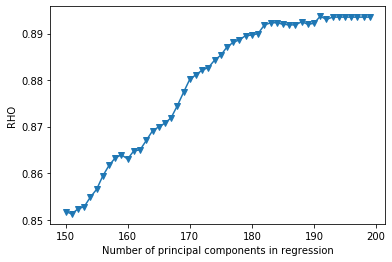

In [10]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.cross_decomposition import PLSRegression, PLSSVD
from sklearn.metrics import mean_squared_error

# Plot results
plt.plot(comp, rho, '-v')
plt.xlabel('Number of principal components in regression')
plt.ylabel('RHO')
# plt.title('Salary')
# plt.xlim(xmin=comp[0])

In [6]:
from sklearn.cross_decomposition import PLSRegression

x = pd.read_csv("/Users/sabanazir/Documents/Adj-Noun Composition/fast/Nouns/openl3_noun_embeddings.csv")
y = pd.read_csv("/Users/sabanazir/Documents/Adj-Noun Composition/fast/Adj-Nouns/bert_adjnoun_embeddings.csv")

df_x= x.loc[:, x.columns!=x.columns[0]]
df_y= y.loc[:, y.columns!=y.columns[0]]

X= df_x
Y= df_y

pls = PLSRegression(n_components=1)
pls.fit(X, Y)

Y_pred = pls.predict(X)
# pls.x_mean_(X)
print(Y_pred.shape)

print("N:",df_x.shape)
print ("A:",pls.coef_.shape)
print ("corpus AN:", df_y.shape)

AN=np.dot(df_x,pls.coef_)
print("observed AN:", AN.shape)

AN





(194, 768)
N: (194, 512)
A: (512, 768)
corpus AN: (194, 768)
observed AN: (194, 768)


array([[ 0.01551827,  0.02596521, -0.02680373, ..., -0.00932623,
        -0.03229363,  0.05928757],
       [ 0.01887202,  0.0315767 , -0.03259644, ..., -0.01134177,
        -0.03927279,  0.07210055],
       [ 0.0189869 ,  0.03176893, -0.03279487, ..., -0.01141081,
        -0.03951186,  0.07253946],
       ...,
       [ 0.01319478,  0.02207755, -0.02279052, ..., -0.00792985,
        -0.02745843,  0.05041068],
       [ 0.0069827 ,  0.01168347, -0.01206078, ..., -0.00419649,
        -0.01453105,  0.02667742],
       [ 0.01854142,  0.03102356, -0.03202543, ..., -0.01114309,
        -0.03858483,  0.07083752]])

In [881]:
import pandas as pd
EAN=pd.DataFrame(AN)
EAN

# EAN.to_csv("/Users/sabanazir/Documents/Adj-Noun Composition/LR/Reg_openl3-AN.csv")

In [6]:
df_mean_noun= pd.read_csv("/Users/sabanazir/Documents/Adj-Noun Composition/fast/Adj-Nouns/openl3_adjnoun_embeddings.csv")

df_mean_noun

,0,1,2,3,4,5,6,7,8,9,...,503,504,505,506,507,508,509,510,511,512
0,n_fast helicopter,1.532763,4.287294,2.842828,2.968718,1.901738,3.223869,2.362051,1.504677,2.503704,...,1.821950,2.457626,3.317166,2.368294,2.630965,3.335762,2.999969,1.384075,2.448805,2.897105
1,n_fast crawling,1.395982,4.192382,2.725104,2.608494,1.992640,3.180674,2.273008,1.500773,2.250038,...,1.416674,2.490629,2.641250,1.731947,2.369555,3.237322,2.593691,1.527624,2.165902,2.782044
2,n_fast zip,1.688126,4.452752,3.120102,3.279495,2.141798,3.152549,2.121504,1.456523,2.241609,...,1.991433,2.608259,3.195506,2.018071,2.569738,3.558806,3.322090,1.634499,2.458545,3.353615
3,n_fast heart,1.656335,4.254478,2.406494,3.013436,1.683758,3.276671,2.889117,1.523069,2.443207,...,1.594245,2.609958,3.215387,2.371075,2.403646,3.309705,3.162046,1.706863,2.290753,1.994055
4,n_fast writing,1.669746,4.282705,2.840697,3.152903,2.144948,3.105286,2.188861,1.442194,2.359863,...,1.790960,2.463457,3.651066,2.160691,2.535074,3.471526,3.155708,1.482400,2.556990,3.238763
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,n_fast collision,1.708631,4.473334,3.028483,2.927464,1.956790,3.027867,2.265047,1.230115,2.344376,...,1.591626,2.349178,3.229442,2.216702,2.677169,3.553365,3.488662,1.547112,2.513708,3.142413
190,n_fast steam,1.620625,4.233724,2.746811,2.952249,2.159726,3.268308,2.255117,1.569186,2.706184,...,1.911342,1.827233,3.259744,2.533562,2.594197,3.341616,2.960495,1.515430,2.519829,3.075636
191,n_fast tinkle,1.317451,4.346100,3.554153,2.458173,2.230771,2.841815,1.890952,1.613739,2.752204,...,2.318676,1.732738,2.253999,2.705086,2.351230,3.226836,2.864777,1.091537,2.698959,2.889287
192,n_fast spaceship,1.663936,5.333527,2.659606,2.844930,2.133603,3.299240,2.418326,0.849058,2.857344,...,2.000847,2.535991,3.183335,1.474155,2.985543,3.609639,3.220443,2.241876,2.254230,3.125394


In [2]:
# calculate cosines
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine
import pandas as pd
import numpy as np

# df_mean_noun= pd.read_csv("/Users/sabanazir/Documents/Adj-Noun Composition/fast/Adj-Nouns/openl3_adjnoun_embeddings.csv")

y1 = pd.read_csv("/Users/sabanazir/Documents/Adj-Noun Composition/fast/Adj-Nouns/bert_adjnoun_embeddings.csv")
y2 = pd.read_csv("/Users/sabanazir/Documents/Adj-Noun Composition/fast/Adj-Nouns/openl3_adjnoun_embeddings.csv")

y11= y1.loc[:, y1.columns!=y1.columns[0]]
y22= y2.loc[:, y2.columns!=y2.columns[0]]

y=pd.concat([y11, y22],axis=1, ignore_index=True)

name_list= y1.iloc[:, 0].values

df_embed=y
# df_embed=df_mean_noun.drop(df_mean_noun.columns[0], axis=1)

print (df_embed.shape)

# Get distance matrix
dist_out = 1-pairwise_distances(df_embed, metric="cosine")

# Get upper tirangle
df_all_noun_cosines = pd.DataFrame(dist_out,index=name_list) 
df_all_noun_cosines.columns=name_list

# ------getting upper triangle----
values=pd.DataFrame(df_all_noun_cosines) 
values = values.where(np.triu(np.ones(values.shape)).astype(np.bool))

# "values" is the cosine upper triangle
values = values.stack().reset_index() 
values.columns = ['Noun1','Noun2','Cosines']

cosine_upper_triangle=pd.DataFrame(values)
# cosine_upper_triangle.to_csv("/Users/sabanazir/Documents/Adj-Noun Composition/fast/Nouns/n_openl3_cosines.csv",index=False)
cosine_upper_triangle


(194, 1280)


ModuleNotFoundError: No module named 'numpy.core._multiarray_umath'

,Noun1,Noun2,Cosines
0,fast stab,fast stab,1.000000
1,fast stab,fast button,0.980059
2,fast stab,fast pluck,0.984317
3,fast stab,fast wheel,0.980912
4,fast stab,fast radar,0.987878
...,...,...,...
18910,fast audio,fast sea,0.968052
18911,fast audio,fast rythm,0.973780
18912,fast sea,fast sea,1.000000
18913,fast sea,fast rythm,0.957958


In [3]:
# calculate cosines
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine
import pandas as pd
import numpy as np


# name_list= df_mean_noun.iloc[:, 0].values

df_embed=AN

print (df_embed.shape)

# Get distance matrix
dist_out = 1-pairwise_distances(df_embed, metric="cosine")

# Get upper tirangle
df_all_noun_cosines = pd.DataFrame(dist_out,index=name_list) 
df_all_noun_cosines.columns=name_list

# ------getting upper triangle----
values=pd.DataFrame(df_all_noun_cosines) 
values = values.where(np.triu(np.ones(values.shape)).astype(np.bool))

# "values" is the cosine upper triangle
values = values.stack().reset_index() 
values.columns = ['Noun1','Noun2','Cosines']

cosine_upper_triangle_obs=pd.DataFrame(values)
# cosine_upper_triangle.to_csv("/Users/sabanazir/Documents/Adj-Noun Composition/fast/Nouns/n_openl3_cosines.csv",index=False)
# cosine_upper_triangle_obs

(194, 1280)


In [4]:
import numpy as np
import scipy.stats
# x = np.arange(10, 20)
# y = np.array([2, 1, 4, 5, 8, 12, 18, 25, 96, 48])

x=cosine_upper_triangle.Cosines
y=cosine_upper_triangle_obs.Cosines

print (scipy.stats.pearsonr(x, y))    # Pearson's r

print (scipy.stats.spearmanr(x, y) )  # Spearman's rho

print (scipy.stats.kendalltau(x, y))  # Kendall's tau

(0.8917783726152091, 0.0)
SpearmanrResult(correlation=0.8935455899957101, pvalue=0.0)
KendalltauResult(correlation=0.722006184992219, pvalue=0.0)


In [5]:
# calculate euclidean

from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine

df_mean_noun= pd.read_csv("/Users/sabanazir/Documents/Adj-Noun Composition/fast/Adj-Nouns/openl3_adjnoun_embeddings.csv")

name_list= df_mean_noun.iloc[:, 0].values

df_embed=df_mean_noun.drop(df_mean_noun.columns[0], axis=1)

# Get distance matrix
dist_out = 1-pairwise_distances(df_embed, metric="euclidean")

# Get upper tirangle
df_all_noun_cosines = pd.DataFrame(dist_out,index=name_list) 
df_all_noun_cosines.columns=name_list

# ------getting upper triangle----
values=pd.DataFrame(df_all_noun_cosines) 
values = values.where(np.triu(np.ones(values.shape)).astype(np.bool))

# "values" is the cosine upper triangle
values = values.stack().reset_index() 
values.columns = ['Noun1','Noun2','Euclidean']

cosine_upper_triangle=pd.DataFrame(values)
# cosine_upper_triangle.to_csv("/Users/sabanazir/Documents/Adj-Noun Composition/fast/Nouns/n_openl3_euclidean.csv",index=False)
cosine_upper_triangle



,Noun1,Noun2,Euclidean
0,n_fast helicopter,n_fast helicopter,1.000000
1,n_fast helicopter,n_fast crawling,-7.651398
2,n_fast helicopter,n_fast zip,-5.946731
3,n_fast helicopter,n_fast heart,-7.519015
4,n_fast helicopter,n_fast writing,-4.731313
...,...,...,...
18910,n_fast tinkle,n_fast spaceship,-12.889694
18911,n_fast tinkle,n_fast diesel,-10.135357
18912,n_fast spaceship,n_fast spaceship,0.999998
18913,n_fast spaceship,n_fast diesel,-14.991962


In [6]:
# calculate euclidean

from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine


df_embed=AN

# Get distance matrix
dist_out = 1-pairwise_distances(df_embed, metric="euclidean")

# Get upper tirangle
df_all_noun_cosines = pd.DataFrame(dist_out,index=name_list) 
df_all_noun_cosines.columns=name_list

# ------getting upper triangle----
values=pd.DataFrame(df_all_noun_cosines) 
values = values.where(np.triu(np.ones(values.shape)).astype(np.bool))

# "values" is the cosine upper triangle
values = values.stack().reset_index() 
values.columns = ['Noun1','Noun2','Euclidean']

cosine_upper_triangle_obs=pd.DataFrame(values)
# cosine_upper_triangle.to_csv("/Users/sabanazir/Documents/Adj-Noun Composition/fast/Nouns/n_openl3_euclidean.csv",index=False)
cosine_upper_triangle_obs




,Noun1,Noun2,Euclidean
0,n_fast helicopter,n_fast helicopter,1.000000
1,n_fast helicopter,n_fast crawling,-1.955366
2,n_fast helicopter,n_fast zip,-1.298895
3,n_fast helicopter,n_fast heart,-1.745716
4,n_fast helicopter,n_fast writing,-0.875637
...,...,...,...
18910,n_fast tinkle,n_fast spaceship,-3.846758
18911,n_fast tinkle,n_fast diesel,-2.755647
18912,n_fast spaceship,n_fast spaceship,1.000000
18913,n_fast spaceship,n_fast diesel,-4.444816


In [7]:
import numpy as np
import scipy.stats
# x = np.arange(10, 20)
# y = np.array([2, 1, 4, 5, 8, 12, 18, 25, 96, 48])

x=cosine_upper_triangle.Euclidean
y=cosine_upper_triangle_obs.Euclidean

print (scipy.stats.pearsonr(x, y))    # Pearson's r

print (scipy.stats.spearmanr(x, y) )  # Spearman's rho

print (scipy.stats.kendalltau(x, y))  # Kendall's tau

(0.9887883318640791, 0.0)
SpearmanrResult(correlation=0.9852437224741292, pvalue=0.0)
KendalltauResult(correlation=0.8977073853320353, pvalue=0.0)


In [4]:
from sklearn.cross_decomposition import PLSRegression
from sklearn.svm import SVR
import pandas as pd
import numpy as np


x = pd.read_csv("/Users/sabanazir/Documents/Adj-Noun Composition/fast/Nouns/openl3_noun_embeddings.csv")
y = pd.read_csv("/Users/sabanazir/Documents/Adj-Noun Composition/fast/Adj-Nouns/openl3_adjnoun_embeddings.csv")

df_x= x.loc[:, x.columns!=x.columns[0]]
df_y= y.loc[:, y.columns!=y.columns[0]]

X= df_x
Y= df_y

pls = PLSRegression(n_components=192)
pls.fit(X, Y)

Y_pred = pls.predict(X)
# pls.x_mean_(X)
print(Y_pred.shape)


print("N:",df_x.shape)
print ("A:",pls.coef_.shape)
print ("corpus AN:", df_y.shape)

AN=np.dot(df_x,pls.coef_)
print("observed AN:", AN.shape)


import pandas as pd
EAN=pd.DataFrame(AN)
EAN

EAN.to_csv("/Users/sabanazir/Desktop/Viva Tests/Reg_openl3-AN.csv", index=False)


(194, 512)
N: (194, 512)
A: (512, 512)
corpus AN: (194, 512)
observed AN: (194, 512)


In [7]:
from sklearn.cross_decomposition import PLSRegression
import pandas as pd
import numpy as np

x1 = pd.read_csv("/Users/sabanazir/Documents/Adj-Noun Composition/fast/Nouns/bert_noun_embeddings.csv")
x2 = pd.read_csv("/Users/sabanazir/Documents/Adj-Noun Composition/fast/Nouns/openl3_noun_embeddings.csv")
y1 = pd.read_csv("/Users/sabanazir/Documents/Adj-Noun Composition/fast/Adj-Nouns/bert_adjnoun_embeddings.csv")
y2 = pd.read_csv("/Users/sabanazir/Documents/Adj-Noun Composition/fast/Adj-Nouns/openl3_adjnoun_embeddings.csv")


x11= x1.loc[:, x1.columns!=x1.columns[0]]
x22= x2.loc[:, x2.columns!=x2.columns[0]]
y11= y1.loc[:, y1.columns!=y1.columns[0]]
y22= y2.loc[:, y2.columns!=y2.columns[0]]


x=pd.concat([x11, x22],axis=1, ignore_index=True)
y=pd.concat([y11, y22],axis=1, ignore_index=True)

print (x.shape)
print (y.shape)

pls = PLSRegression(n_components=194)
pls.fit(x, y)


print("N:",x.shape)
print ("A:",pls.coef_.shape)
print ("corpus AN:", y.shape)

AN=np.dot(x,pls.coef_)
print("observed AN:", AN.shape)

AN

import pandas as pd
EAN=pd.DataFrame(AN)
EAN


EAN.to_csv("/Users/sabanazir/Desktop/Viva Tests/Reg_openl3-cocatAN.csv", index=False)

(194, 1280)
(194, 1280)


/opt/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:79: ConvergenceWarning: Maximum number of iterations reached
  ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:292: UserWarning: Y residual constant at iteration 193
  warnings.warn('Y residual constant at iteration %s' % k)


N: (194, 1280)
A: (1280, 1280)
corpus AN: (194, 1280)
observed AN: (194, 1280)


# PSLR Non-Averaging Test

In [895]:
from sklearn.cross_decomposition import PLSRegression

x = pd.read_csv("/Users/sabanazir/Documents/Adj-Noun Composition/fast/Nouns/noAvg_openl3_noun_embeddings.csv")
y = pd.read_csv("/Users/sabanazir/Documents/Adj-Noun Composition/fast/Adj-Nouns/noAvg_openl3_Adjnoun_embeddings.csv")


# print("N:",x.shape)
# print ("corpus AN:", y.shape)

pls = PLSRegression(n_components=43)
pls.fit(x.T, y.T)

Y_pred = pls.predict(x.T)
# pls.x_mean_(X)
# print(Y_pred.shape)

print("N:",x.T.shape)
print ("A:",pls.coef_.shape)
print ("corpus AN:", y.T.shape)

AN=np.dot(x.T,pls.coef_)
print("observed AN:", AN.shape)

AN


# (194, 512)
# N: (194, 512)
# A: (512, 512)
# corpus AN: (194, 512)
# observed AN: (194, 512)


N: (512, 17704)
A: (17704, 5657)
corpus AN: (512, 5657)
observed AN: (512, 5657)


array([[1.429, 1.544, 1.552, ..., 1.546, 1.69 , 1.436],
       [2.285, 1.529, 1.863, ..., 0.945, 2.479, 1.793],
       [3.714, 4.857, 2.774, ..., 2.636, 3.466, 3.465],
       ...,
       [2.553, 3.45 , 2.048, ..., 2.052, 2.304, 2.689],
       [1.486, 2.001, 1.615, ..., 1.476, 1.311, 1.593],
       [2.041, 3.33 , 1.491, ..., 1.257, 1.75 , 1.612]])

In [898]:
import pandas as pd
EAN=pd.DataFrame(AN.T)
EAN

EAN.to_csv("/Users/sabanazir/Documents/Adj-Noun Composition/LR/NoAvgReg_openl3-AN.csv", index=False)

In [899]:
EAN

,0,1,2,3,4,5,6,7,8,9,...,502,503,504,505,506,507,508,509,510,511
0,1.428749,2.285277,3.714172,2.994503,3.741125,2.247929,0.863203,1.854477,2.029424,3.711918,...,2.505779,1.753336,2.728186,2.742959,1.808963,1.321867,1.353592,2.552710,1.485980,2.041499
1,1.543748,1.528974,4.856602,3.704720,3.277331,2.332409,1.124689,1.474891,1.067108,4.818307,...,3.847236,2.216274,3.405103,3.350000,2.306859,2.890594,2.666166,3.450245,2.001424,3.330264
2,1.551938,1.862901,2.773794,2.616536,2.654298,1.269373,0.601241,0.979090,1.156978,2.317137,...,1.696385,1.278118,2.306130,2.026977,1.785659,1.038082,1.265234,2.047624,1.615351,1.490619
3,1.585982,2.237860,3.525830,3.164379,2.414964,1.715305,1.025892,1.811833,1.360627,3.468466,...,3.164331,1.385384,3.079437,2.471474,1.738836,2.137646,2.069138,2.784724,1.982980,2.194439
4,1.550392,1.030657,3.797400,3.661783,2.886036,1.008441,0.894364,1.293854,0.932759,4.218868,...,3.055790,2.058720,3.498441,1.887469,2.139517,2.869253,1.626167,3.611859,2.047136,2.062602
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5652,1.364658,2.449758,3.465831,2.541915,3.030885,2.094195,0.779995,1.493472,1.794096,3.271993,...,2.436159,1.318836,2.749466,2.209374,1.562676,1.269584,1.122849,2.423868,1.517444,1.772586
5653,1.578629,1.468150,2.691551,1.899859,3.497873,1.717685,0.647166,0.889626,1.163077,2.781362,...,1.602641,1.550738,2.051627,1.057617,1.867379,1.046103,0.585742,2.024021,1.501168,1.234296
5654,1.545778,0.945022,2.636338,2.135800,2.877021,1.578188,0.777555,0.750628,0.984907,2.778410,...,1.516192,1.668255,2.206121,1.111348,1.930754,1.094820,0.510412,2.052026,1.475858,1.256723
5655,1.689593,2.478745,3.465703,2.343260,2.995995,1.969656,0.751525,1.510159,1.798042,3.135392,...,2.202567,1.317068,2.512757,2.404521,1.718228,1.225901,1.046582,2.304184,1.310977,1.750472
